<a href="https://colab.research.google.com/github/jward6301/datasci_6_anova/blob/main/datasci_6_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing packages and dataset

In [51]:
!pip install ucimlrepo

In [65]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [53]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Variables of Interest

**Research Question:** Does the race of the patient and their gender have a combined influence the length of their hospital stay (time_in_hospital)?

**IV1**: Race

**IV2**: Gender

**DV**: time_in_hospital

**H0 (Null Hypothesis)**: There is no significant combined influence of race and gender on the length of their hospital stay.

**H1 (Alternative Hypothesis)**: There is a significant combined influence of race and gender on the length of their hospital stay.


These variables were selected due to my interest in how race and gender would affect the length of hospital stay. I predict that it will influence the length of stay.

In [54]:
# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

In [55]:
df = pd.DataFrame(X)
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [74]:
df = df[(df['gender'].isin(['Male', 'Female']))]

In [69]:
df_new = df[['race', 'gender', 'time_in_hospital']]
df_new

,race,gender,time_in_hospital
0,Caucasian,Female,1
1,Caucasian,Female,3
2,AfricanAmerican,Female,2
3,Caucasian,Male,2
4,Caucasian,Male,1
...,...,...,...
101761,AfricanAmerican,Male,3
101762,AfricanAmerican,Female,5
101763,Caucasian,Male,1
101764,Caucasian,Female,10


In [70]:
data_type = df_new.dtypes
data_type

race                object
gender              object
time_in_hospital     int64
dtype: object

Assumption Check

In [60]:
stats.shapiro(df_new['time_in_hospital'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)

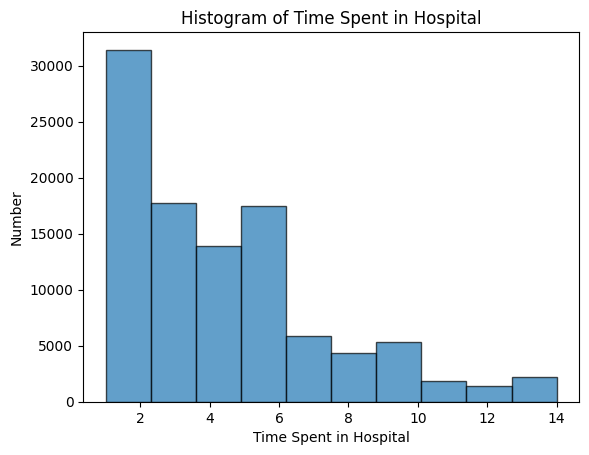

In [61]:
plt.hist(df_new['time_in_hospital'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Time Spent in Hospital')
plt.xlabel('Time Spent in Hospital')
plt.ylabel('Number')
plt.show()

In [71]:
groups = df_new.groupby(['race', 'gender'])

for (race_status, gender_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({race_status}, {gender_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")


Group (AfricanAmerican, Female):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Male):
P-value from Shapiro-Wilk Test: 0.0

Group (Asian, Female):
P-value from Shapiro-Wilk Test: 9.520779367313894e-17

Group (Asian, Male):
P-value from Shapiro-Wilk Test: 4.219604476332644e-16

Group (Caucasian, Female):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Male):
P-value from Shapiro-Wilk Test: 0.0

Group (Hispanic, Female):
P-value from Shapiro-Wilk Test: 9.368428169951816e-30

Group (Hispanic, Male):
P-value from Shapiro-Wilk Test: 5.67417287622373e-27

Group (Other, Female):
P-value from Shapiro-Wilk Test: 2.508905647524163e-24

Group (Other, Male):
P-value from Shapiro-Wilk Test: 1.5322922575434318e-23



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Interpretation: The Shapiro-Wilk test shows that a majority of the variables are significantly not normally distributed, as many are 0 or close to 0. The histogram is right-skewed, also showing that it is not a normal distribution. This means that the null hypothesis would be rejected and that race and gender do impact length of stay.
* Also the warning recieved shows that the sample size is very large and may not acurately reflect the correct results.

In [72]:
stats.levene(
    df_new['time_in_hospital'][df_new['race'] == 'AfricanAmerican'][df_new['gender'] == 'Female'],
    df_new['time_in_hospital'][df_new['race'] == 'AfricanAmerican'][df_new['gender'] == 'Male'],
    df_new['time_in_hospital'][df_new['race'] == 'Asian'][df_new['gender'] == 'Female'],
    df_new['time_in_hospital'][df_new['race'] == 'Asian'][df_new['gender'] == 'Male'],
    df_new['time_in_hospital'][df_new['race'] == 'Caucasian'][df_new['gender'] == 'Female'],
    df_new['time_in_hospital'][df_new['race'] == 'Caucasian'][df_new['gender'] == 'Male'],
    df_new['time_in_hospital'][df_new['race'] == 'Hispanic'][df_new['gender'] == 'Female'],
    df_new['time_in_hospital'][df_new['race'] == 'Hispanic'][df_new['gender'] == 'Male'],
    df_new['time_in_hospital'][df_new['race'] == 'Other'][df_new['gender'] == 'Female'],
    df_new['time_in_hospital'][df_new['race'] == 'Other'][df_new['gender'] == 'Male'],
)

LeveneResult(statistic=4.212648053226347, pvalue=1.8106820990342793e-05)

Interpretation: The p-value is very small, and the null hypothesis would be rejected. A conclusion can be that there is evidence that there is unequal variances among the groups.


ANOVA

In [73]:
model = ols('time_in_hospital ~ C(race) * (gender)', data=df_new).fit()

anova_table = sm.stats.anova_lm(model, typ =2)
print(anova_table)

                       sum_sq       df          F        PR(>F)
C(race)            541.291144      4.0  15.189971  2.025732e-12
gender             707.448149      1.0  79.410993  5.127034e-19
C(race):gender      94.442648      4.0   2.650295  3.143751e-02
Residual        886254.590879  99482.0        NaN           NaN


Interpretation: The p-value for race and gender is is less than 0.05, meaning that there are signficant differences in length of hospital stay based on gender or race.

Post Hoc-test

In [81]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [89]:
tukey_race = pairwise_tukeyhsd(endog=df_new['time_in_hospital'], groups=df['race'], alpha=0.05)
print("tukey test for race:\n", posthoc_race)

tukey_gender = pairwise_tukeyhsd(endog=df_new['time_in_hospital'], groups=df['gender'], alpha=0.05)
print("tukey test for gender:\n", posthoc_gender)

TypeError: ignored

# Issues
* I ran into three issues, which I had to fix before completing this assignment. During the Shapiro-Wilk Test, it was running properly but I was recieving an error code of "ValueError: Data must be at least length 3." When running ANOVA it ran but I was also receiving an error code. This was resolved by removing fields under gender that were not male or female.  

* The Tukey test would also not run and after multiple attempts of trying to fix it, I could still not get it to work properly.

Downloading the new CSV

In [76]:
df_new.to_csv('diabetes_new.csv')